In [13]:
import cv2
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [14]:
#for debugging not needed in end
from matplotlib import pyplot as plt

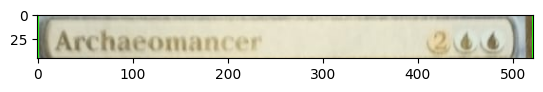

In [15]:
# Import required packages
#https://www.geeksforgeeks.org/text-detection-and-extraction-using-opencv-and-ocr/

# Mention the installed location of Tesseract-OCR in your system
 
# Read image from which text needs to be extracted
img = cv2.imread("results/Header.png")
#img = cv2.imread('tests/controled1.jpg')

 
# Preprocessing the image starts
 
# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
 
# Specify structure shape and kernel size. 
# Kernel size increases or decreases the area 
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect 
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
 
# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
 
# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, 
                                                 cv2.CHAIN_APPROX_NONE)
 
# Creating a copy of image
im2 = img.copy()
plt.imshow(im2)
plt.show()

In [16]:
# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
     
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
     
    # Cropping the text block for giving input to OCR
    cropped = im2[y:y + h, x:x + w]
     
    # Open the file in append mode
    file = open("results/recognized.txt", "a")
     
    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(cropped)
    print(text)
    # Appending the text into file
    file.write(text)
    file.write("\n")
     
    # Close the file
    file.close
# A text file is created and flushed
file = open("results/recognized.txt", "w+")
file.write("")
file.close()

Archaeomancer


